<a href="https://colab.research.google.com/github/sithu1205/2052128_DSPL_Week7/blob/main/week7_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


TASK 2

In [ ]:
diabetes_patients = df[df['Outcome'] == 1]
median_bp = diabetes_patients['BloodPressure'].median()
print(f"Median Blood Pressure for diabetic patients: {median_bp}")


Median Blood Pressure for diabetic patients: 74.0


TASK 3

In [ ]:
print(df['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


TASK 4

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


TASK 5

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


Stratify ensures both sets have the same proportion of diabetic vs non-diabetic cases — important for balanced evaluation.


TASK 6

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


TASK 7

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.74


TASK 8

In [ ]:
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f'Training Accuracy: {train_acc:.2f}')
print(f'Test Accuracy: {test_acc:.2f}')


Training Accuracy: 1.00
Test Accuracy: 0.74


TASK 10

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[106  19]
 [ 30  37]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



TASK 11

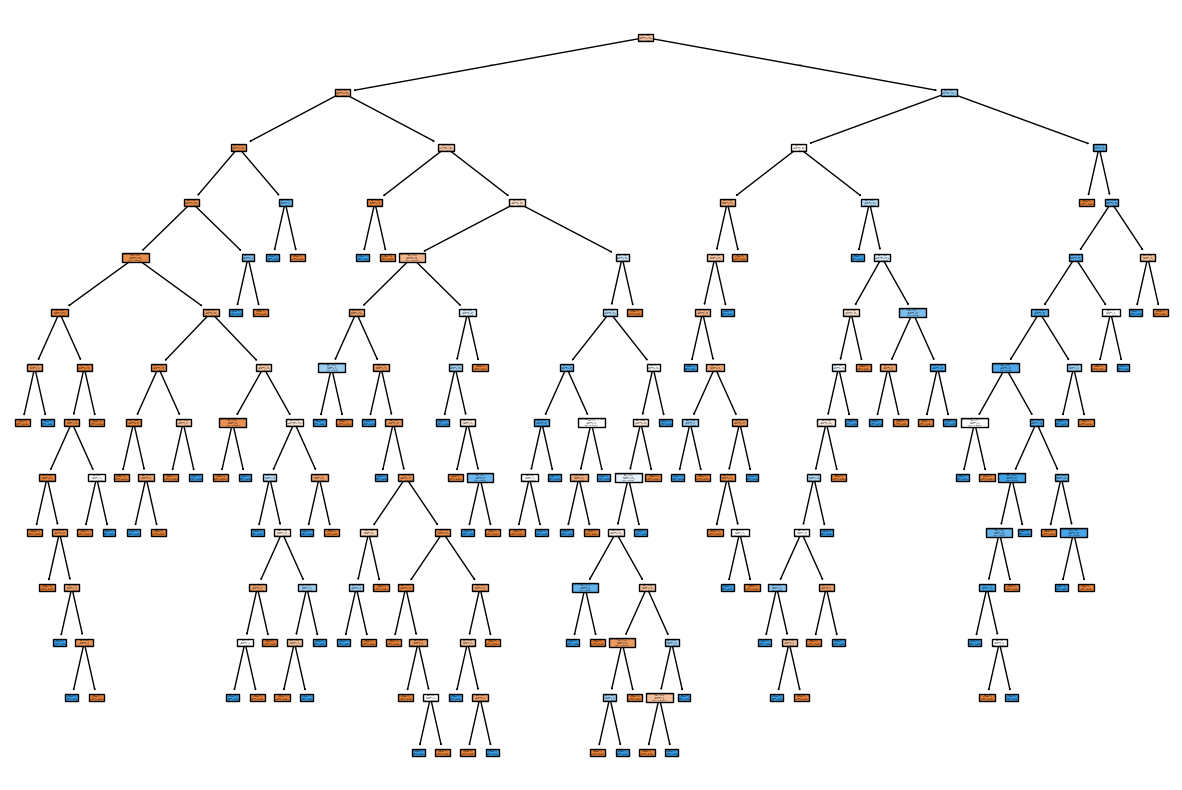

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


TASK 12

In [ ]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.3f}')


Pregnancies: 0.059
Glucose: 0.339
BloodPressure: 0.097
SkinThickness: 0.024
Insulin: 0.079
BMI: 0.168
DiabetesPedigreeFunction: 0.118
Age: 0.116


TASK 13

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))


[[114  11]
 [ 41  26]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.81       125
           1       0.70      0.39      0.50        67

    accuracy                           0.73       192
   macro avg       0.72      0.65      0.66       192
weighted avg       0.72      0.73      0.70       192



TASK 14

In [ ]:
import pandas as pd

df_weather = pd.read_csv('/content/pm25_2016_2020.csv')
print(df_weather.head())
print(df_weather.columns)


geo_columns = ['latitude_x', 'longitude_x']


   Unnamed: 0 date_local  latitude_x  longitude_x  elevation  tavg  tmin  \
0           0  6/15/2017   39.024265   -95.711275      280.0   NaN   NaN   
1           1  6/18/2017   39.024265   -95.711275      280.0   NaN   NaN   
2           2  6/21/2017   39.024265   -95.711275      280.0   NaN   NaN   
3           3  6/24/2017   39.024265   -95.711275      280.0   NaN   NaN   
4           4  6/30/2017   39.024265   -95.711275      280.0   NaN   NaN   

   tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun  arithmetic_mean_a  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                8.6   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                3.4   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                6.6   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.1   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN                5.0   

   arithmetic_mean_b  
0                9.2  
1                3.9  
2                6.7  
3                5

TASK 15

In [ ]:
df_weather = pd.read_csv('pm25_2016_2020.csv')
print(df_weather.columns)

Index(['Unnamed: 0', 'date_local', 'latitude_x', 'longitude_x', 'elevation',
       'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'arithmetic_mean_a', 'arithmetic_mean_b'],
      dtype='object')


In [ ]:
geo_columns = ['latitude_x', 'longitude_x']

In [ ]:
X = df_weather[geo_columns]
print(X.head())

   latitude_x  longitude_x
0   39.024265   -95.711275
1   39.024265   -95.711275
2   39.024265   -95.711275
3   39.024265   -95.711275
4   39.024265   -95.711275


TASK 16

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_weather['Cluster'] = kmeans.fit_predict(X)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_weather['Cluster'] = kmeans.fit_predict(X)

# Create a new DataFrame for cleaner output (like your friend's)
geo_df = df_weather[['latitude_x', 'longitude_x', 'Cluster']].copy()

# Rename columns to match your friend's output
geo_df = geo_df.rename(columns={'Latitude': 'latitude_x', 'Longitude': 'longitude_x'})

# Show result
print(geo_df.head())

   latitude_x  longitude_x  Cluster
0   39.024265   -95.711275        2
1   39.024265   -95.711275        2
2   39.024265   -95.711275        2
3   39.024265   -95.711275        2
4   39.024265   -95.711275        2


TASK 17

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_weather['Cluster'] = kmeans.fit_predict(X)

# Check how many in each cluster
print(df_weather['Cluster'].value_counts())


Cluster
0    25672
2    24659
3    22089
1    16918
4    10662
Name: count, dtype: int64


TASK 18

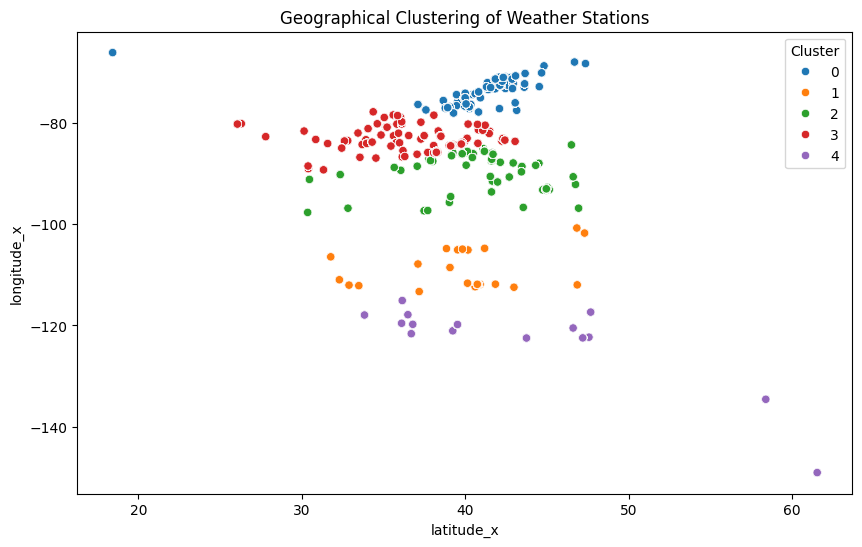

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude_x', y='longitude_x', hue='Cluster', data=df_weather, palette='tab10')
plt.title('Geographical Clustering of Weather Stations')
plt.show()
